# Prediction of thyroid disease using Machine learning and PCA

## 1.DATA WRANGLING

### 1.1 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 Loading the training dataset

In [3]:
td = pd.read_csv(r"C:\Users\Nandhitha\Desktop\thyroid_traindata.csv")

In [4]:
td.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,. Query_hypothyroid,...,Goiter,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


In [5]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3771 non-null   float64
 1   Sex                        3771 non-null   int64  
 2   On_thyroxine               3771 non-null   int64  
 3   Query_on_thyroxine         3771 non-null   int64  
 4   On_antithyroid_medication  3771 non-null   int64  
 5   Sick                       3771 non-null   int64  
 6   Pregnant                   3771 non-null   int64  
 7   Thyroid_surgery            3771 non-null   int64  
 8   I131_treatment             3771 non-null   int64  
 9   . Query_hypothyroid        3771 non-null   int64  
 10  Query_hyperthyroid         3771 non-null   int64  
 11  Lithium                    3771 non-null   int64  
 12  Goiter                     3771 non-null   int64  
 13  Tumor                      3771 non-null   int64

In [6]:
td.Class = td.Class.astype(int)

In [7]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3771 non-null   float64
 1   Sex                        3771 non-null   int64  
 2   On_thyroxine               3771 non-null   int64  
 3   Query_on_thyroxine         3771 non-null   int64  
 4   On_antithyroid_medication  3771 non-null   int64  
 5   Sick                       3771 non-null   int64  
 6   Pregnant                   3771 non-null   int64  
 7   Thyroid_surgery            3771 non-null   int64  
 8   I131_treatment             3771 non-null   int64  
 9   . Query_hypothyroid        3771 non-null   int64  
 10  Query_hyperthyroid         3771 non-null   int64  
 11  Lithium                    3771 non-null   int64  
 12  Goiter                     3771 non-null   int64  
 13  Tumor                      3771 non-null   int64

In [8]:
td.describe()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,. Query_hypothyroid,...,Goiter,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
count,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,...,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000
mean,0.515102,0.303103,0.123309,0.012994,0.011403,0.038451,0.014055,0.014320,0.015115,0.062053,...,0.008751,0.025192,0.000265,0.049324,0.004762,0.020192,0.108284,0.099285,0.110155,2.900027
std,0.189550,0.459660,0.328836,0.113263,0.106187,0.192309,0.117732,0.118821,0.122028,0.241283,...,0.093149,0.156729,0.016284,0.216572,0.023311,0.007422,0.034492,0.018614,0.033497,0.373282
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002000,0.019000,0.002000,1.000000
25%,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000600,0.017000,0.089000,0.089000,0.093000,3.000000
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001600,0.020600,0.105000,0.099000,0.108000,3.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002400,0.023000,0.123000,0.107000,0.122000,3.000000
max,0.940000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.530000,0.105900,0.430000,0.232000,0.612000,3.000000


In [9]:
td.shape

(3771, 22)

In [10]:
td.isnull().values.all()

False

In [11]:
td['Age'] = td['Age'].apply(lambda x: x*100)
td['Age'].head()

0    73.0
1    24.0
2    47.0
3    64.0
4    23.0
Name: Age, dtype: float64

## 2. INFERENTIAL STATISTICS

### 2.1 Heatmap generation to find correlation

Text(0.5, 1.0, 'Heat map for correlation between the features.')

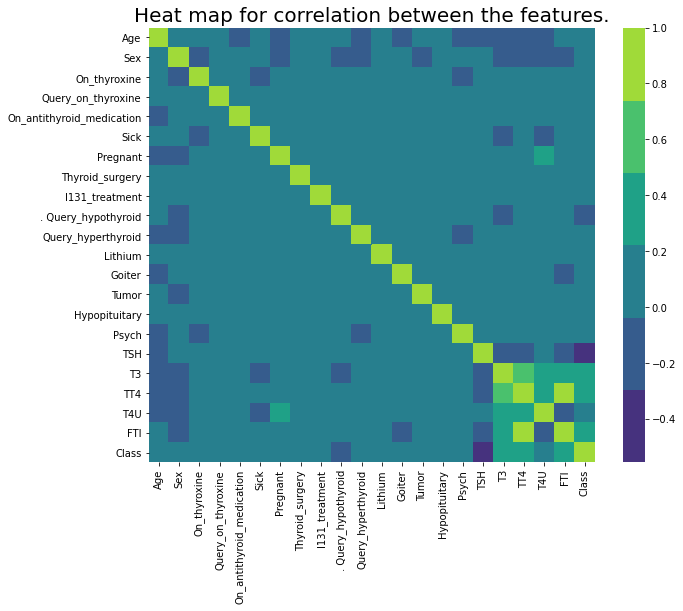

In [12]:
f, ax = plt.subplots(figsize=(10,8))
corr = td.corr()
cmap = sns.color_palette("viridis")
sns.heatmap(corr, cmap=cmap)
ax.set_title('Heat map for correlation between the features.', fontsize=20)

### 2.4 Correlation value between TSH and T3

In [17]:
tsh = td['TSH']
t3 = td['T3']
corr_tsh_t3 = tsh.corr(t3)
print('correlation between TSH measured and T3 measured is', corr_tsh_t3,', and it is',
      'positive' if(corr_tsh_t3 > 0.0) else 'negative','correlation.')

correlation between TSH measured and T3 measured is -0.16142756734616626 , and it is negative correlation.


## 3. EXPLORATORY DATA ANALYSIS

### 3.1 Number of samples in each class

In [18]:
print("Class   Count")
td['Class'].value_counts()

Class   Count


3    3487
2     191
1      93
Name: Class, dtype: int64

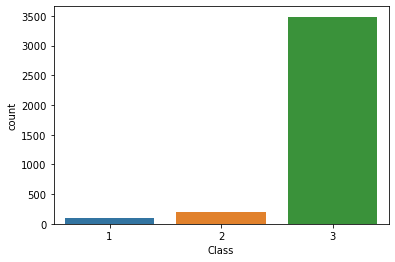

In [19]:
sns.countplot('Class',data=td)

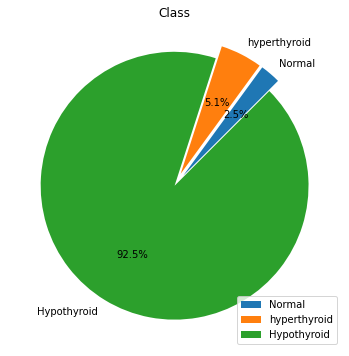

In [20]:
plt.figure(figsize=(6,6))
classes = ['Normal','hyperthyroid','Hypothyroid']
class_cnt = td['Age'].groupby(td['Class']).count()
plt.axis('equal')
plt.pie(class_cnt, startangle=45, labels=classes,autopct='%1.1f%%',shadow=False, explode=(0.1,0.1,0))
plt.legend(classes, loc=4)
plt.title('Class')
plt.show()

### 3.2 Count of male and female grouped by class

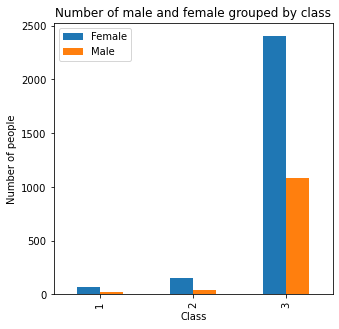

In [21]:
ct2 = pd.crosstab(index=td['Class'],columns=td['Sex'])
ct2.plot(kind='bar',figsize=(5,5), stacked=False).legend(('Female','Male'))
plt.title('Number of male and female grouped by class')
plt.ylabel('Number of people')
plt.show()

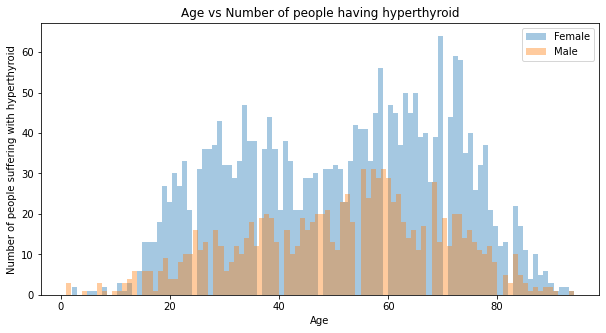

Number of Female suffering from hyperthyroid: (2408, 22)
Number of Male suffering from hyperthyroid: (1079, 22)


In [22]:
fig,ax = plt.subplots(figsize=(10,5))
female_thyr = td.loc[(td['Sex']==0) & (td['Class']==3)]
male_thyr = td.loc[(td['Sex']==1) & (td['Class']==3)]
sns.distplot(female_thyr['Age'], bins=100, kde=False, label="Female")
sns.distplot(male_thyr['Age'], bins=100, kde=False, label="Male")
plt.legend()
plt.ylabel('Number of people suffering with hyperthyroid')
plt.title('Age vs Number of people having hyperthyroid')
plt.show()

print("Number of Female suffering from hyperthyroid:",female_thyr.shape)
print("Number of Male suffering from hyperthyroid:",male_thyr.shape)

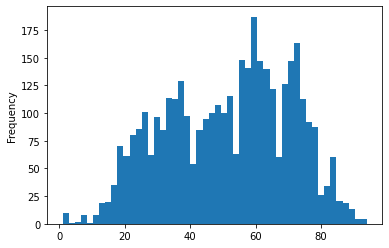

In [23]:
td.Age.plot.hist(bins=50)

### 3.3 Plotting of Class vs Age with respect to Gender

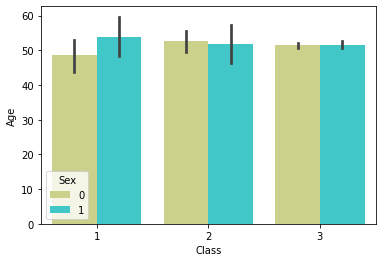

In [24]:
sns.barplot(x='Class',y='Age',hue="Sex",data=td, palette=("rainbow_r"))

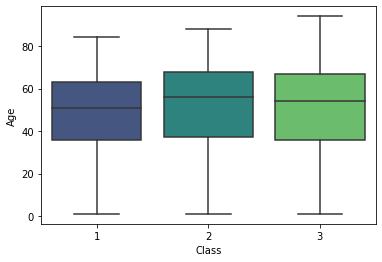

In [25]:
sns.boxplot(x='Class',y='Age',data=td, palette=("viridis"))

### 3.5 Check for other factors which affects thyroid

In [26]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'

print(color.BOLD + 'SICK' + color.END)
td['Sick'].value_counts()


SICK


0    3626
1     145
Name: Sick, dtype: int64

In [27]:
print(color.BOLD + 'GOITER' + color.END)
td['Goiter'].value_counts()


GOITER


0    3738
1      33
Name: Goiter, dtype: int64

In [28]:
print(color.BOLD + 'TUMOR' + color.END)
td['Tumor'].value_counts()


TUMOR


0    3676
1      95
Name: Tumor, dtype: int64

In [29]:
print(color.BOLD + 'THYROID SURGERY' + color.END)
td['Thyroid_surgery'].value_counts()


THYROID SURGERY


0    3717
1      54
Name: Thyroid_surgery, dtype: int64

In [30]:
print(color.BOLD + 'PSYCH' + color.END)
td['Psych'].value_counts()


PSYCH


0    3585
1     186
Name: Psych, dtype: int64

In [31]:
print(color.BOLD + 'PREGNANT' + color.END)
td['Pregnant'].value_counts()

PREGNANT


0    3718
1      53
Name: Pregnant, dtype: int64

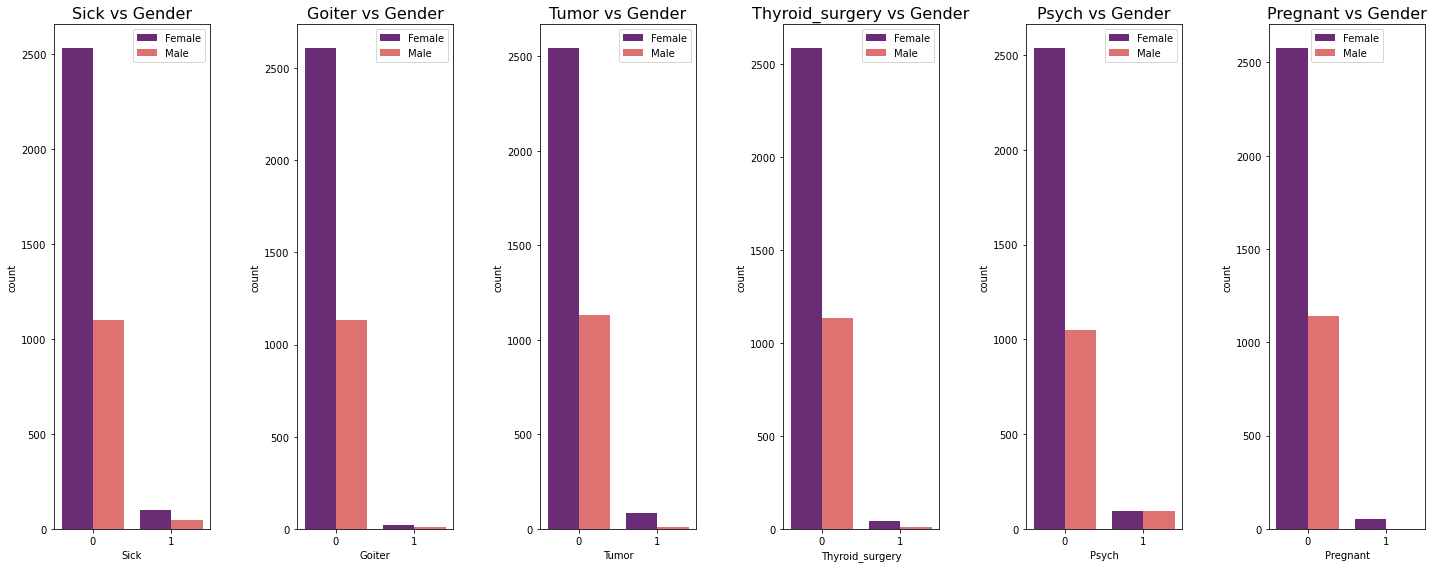

In [32]:
x_colname = ['Sick','Goiter','Tumor', 'Thyroid_surgery', 'Psych','Pregnant']
f, ax = plt.subplots(1,len(x_colname),figsize=(20,8), sharex=False, sharey=False)
for i in range(len(x_colname)):
    sns.countplot(x=x_colname[i], data=td, ax=ax[i], hue='Sex',palette='magma').legend(('Female','Male'))
    ax[i].set_title(str(x_colname[i]) +" vs Gender", fontsize=16)
plt.tight_layout()

## 4. DATA PREPROCESSING

In [33]:
td.keys()

Index(['Age', 'Sex', 'On_thyroxine', 'Query_on_thyroxine',
       'On_antithyroid_medication', 'Sick', 'Pregnant', 'Thyroid_surgery',
       'I131_treatment', '. Query_hypothyroid', 'Query_hyperthyroid',
       'Lithium', 'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH', 'T3',
       'TT4', 'T4U', 'FTI', 'Class'],
      dtype='object')

### 4.1 Standardisation of training data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc=StandardScaler()
sc.fit(td)

StandardScaler()

In [36]:
scaled_data=sc.transform(td)

In [37]:
scaled_data

array([[ 1.1338765 , -0.65949337,  2.66639784, ..., -0.92873586,
         1.07022073,  0.26785839],
       [-1.45153487, -0.65949337, -0.37503781, ...,  1.81156284,
        -0.0643462 ,  0.26785839],
       [-0.23797443, -0.65949337, -0.37503781, ...,  1.70410015,
        -0.96005694,  0.26785839],
       ...,
       [ 1.92532896, -0.65949337, -0.37503781, ..., -0.01530296,
         0.41336619, -2.41143599],
       [ 0.65900503,  1.51631547, -0.37503781, ..., -0.60634778,
         0.32379511,  0.26785839],
       [-0.29073792, -0.65949337, -0.37503781, ..., -0.44515374,
        -0.24348835,  0.26785839]])

In [38]:
sc_covariancematrix = np.cov(scaled_data.T)
sc_covariancematrix


array([[ 1.00026525e+00,  5.50661561e-03,  1.84208865e-02,
        -1.42122021e-02, -6.64285165e-02,  8.39970530e-02,
        -1.18897844e-01, -2.93978422e-02,  5.78029897e-02,
         4.29648642e-02, -3.89878979e-02, -2.91946542e-02,
        -5.18186253e-02, -2.48700961e-02, -2.62254694e-02,
        -1.05020496e-01, -5.32677640e-02, -2.26534315e-01,
        -4.01571369e-02, -1.70497251e-01,  5.92627009e-02,
         4.85037886e-03],
       [ 5.50661561e-03,  1.00026525e+00, -9.81977648e-02,
         3.64277627e-02, -2.73606428e-02,  6.15342850e-03,
        -7.87605715e-02, -3.57903022e-02, -2.02302628e-02,
        -4.28838926e-02, -6.32170724e-02, -6.18643993e-03,
         6.18189408e-03, -7.29014847e-02,  2.47021112e-02,
         9.76085220e-02, -3.18646897e-02, -6.25013214e-02,
        -1.68664088e-01, -2.15445628e-01, -5.21299378e-02,
         4.37140316e-02],
       [ 1.84208865e-02, -9.81977648e-02,  1.00026525e+00,
        -3.00364209e-04, -2.29704738e-03, -4.14521692e-02,
    

In [39]:
eigvalue,eigvector = np.linalg.eig(sc_covariancematrix)
print("Eigenvalues \n%s"%eigvalue)
print("\nEigenvector\n%s"%eigvector)

Eigenvalues 
[2.75840329 1.84131166 0.03184879 0.4549762  0.42443646 1.37366296
 0.67225989 0.77162856 1.16527753 1.13633911 1.11263212 0.81080759
 0.83634214 0.86923818 0.88265198 0.9083053  0.92410816 1.0371256
 0.97866435 0.98924247 1.01750274 1.00907048]

Eigenvector
[[-8.36009743e-02 -2.87918756e-01 -4.91857724e-04 -2.14964364e-01
  -7.45808335e-03  3.49356527e-01  1.90585810e-01  4.11443059e-01
   1.93882486e-01  2.20252001e-01 -1.52205853e-01  5.12768482e-01
   2.58163582e-01  1.80526479e-01 -6.72730156e-02  4.57254964e-02
   1.42842789e-01  9.74247197e-02  5.57907910e-02 -1.41164248e-01
   6.86935249e-02 -2.19357987e-02]
 [-1.16320361e-01 -2.31193669e-01 -7.88901915e-03  1.65665399e-01
   2.39792355e-02 -3.65839200e-01  1.00002489e-01  2.87499308e-01
  -5.65754253e-02 -7.17026578e-03  1.77751006e-01  2.47476376e-01
  -5.11927971e-01 -1.63989694e-01 -4.68141234e-01 -1.13348668e-01
  -4.19392911e-03  9.96378061e-02 -1.83388784e-01  3.27628350e-02
   1.52563436e-02 -1.28452593e-01

In [40]:
eig_pairs = [(np.abs(eigvalue[i]), eigvector[:,i]) for i in range(len(eigvalue))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.7584032948873847
1.841311663594198
0.031848786930982226
0.45497619560309416
0.4244364565898378
1.3736629554140953
0.6722598883287633
0.7716285634181119
1.1652775318816981
1.1363391106396237
1.112632118246756
0.8108075863281852
0.8363421424178755
0.8692381830865509
0.8826519791356404
0.9083052981506611
0.9241081554718847
1.0371255950630673
0.9786643507711537
0.9892424659341646
1.0175027443850564
1.0090704774878014


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)

[0.12534872 0.08367356]


## 5. PRINCIPAL COMPONENT ANALYSIS (PCA)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca=PCA(n_components=2)

In [44]:
pca.fit(scaled_data)

PCA(n_components=2)

In [45]:
x_pca=pca.transform(scaled_data)

In [46]:
scaled_data.shape

(3771, 22)

In [47]:
x_pca.shape

(3771, 2)

In [48]:
scaled_data

array([[ 1.1338765 , -0.65949337,  2.66639784, ..., -0.92873586,
         1.07022073,  0.26785839],
       [-1.45153487, -0.65949337, -0.37503781, ...,  1.81156284,
        -0.0643462 ,  0.26785839],
       [-0.23797443, -0.65949337, -0.37503781, ...,  1.70410015,
        -0.96005694,  0.26785839],
       ...,
       [ 1.92532896, -0.65949337, -0.37503781, ..., -0.01530296,
         0.41336619, -2.41143599],
       [ 0.65900503,  1.51631547, -0.37503781, ..., -0.60634778,
         0.32379511,  0.26785839],
       [-0.29073792, -0.65949337, -0.37503781, ..., -0.44515374,
        -0.24348835,  0.26785839]])

### 5.1 Data visualisation using PCA

In [49]:
x=td['Class']
j, k, l = 0, 0, 0
x1 = [None for m in range(3771)]
y1 = [None for m in range(3771)]
x2 = [None for m in range(3771)]
y2 = [None for m in range(3771)]
x3 = [None for m in range(3771)]
y3 = [None for m in range(3771)]

for i in range(len(x)):
  if x[i] == 1:
    x1[j] = x_pca[i][0]
    y1[j] = x_pca[i][1]
    j += 1

  if x[i] == 2:
    x2[k] = x_pca[i][0]
    y2[k] = x_pca[i][1]
    k += 1
  
  if x[i] == 3:
    x3[l] = x_pca[i][0]
    y3[l] = x_pca[i][1]
    l += 1

In [50]:
pcdf = pd.DataFrame( data =  x_pca,
                    columns = ['pc1', 'pc2'])
pcdf['target'] = td["Class"].map({1: 1, 2 : 2, 3 : 3 })

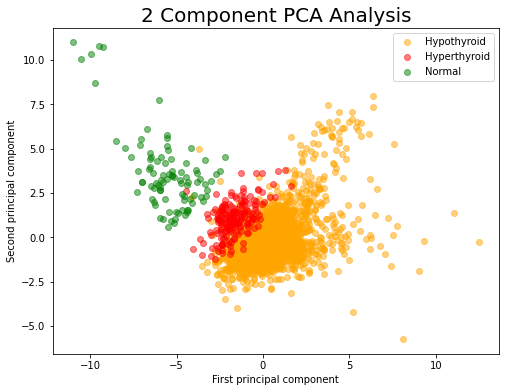

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x3, y3, c = "orange", label = "Hypothyroid", alpha = 0.5)
plt.scatter(x2, y2, c = "red", label = "Hyperthyroid", alpha = 0.5)
plt.scatter(x1, y1, c = "green", label = "Normal", alpha = 0.5)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("2 Component PCA Analysis",fontsize=20)
plt.legend()

In [52]:
pcdf.head()

,pc1,pc2,target
0,0.553133,-1.433358,3
1,1.718449,1.535308,3
2,0.213629,1.273166,3
3,-1.295203,-0.904930,3
4,1.487260,-0.181061,3


In [53]:
X = pcdf.loc[: , 'pc1':'pc2']
Y = pcdf.loc[:,'target']

In [54]:
X.head()

,pc1,pc2
0,0.553133,-1.433358
1,1.718449,1.535308
2,0.213629,1.273166
3,-1.295203,-0.904930
4,1.487260,-0.181061


In [55]:
Y.head()

0    3
1    3
2    3
3    3
4    3
Name: target, dtype: int64

### Loading testing data

In [56]:
test = pd.read_excel(r"C:\Users\Nandhitha\Desktop\thyroid_testdata.xlsx")

In [57]:
test.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goiter,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0061,0.028,0.111,0.131,0.085,2
1,0.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0013,0.019,0.084,0.078,0.107,3
2,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0000,0.031,0.239,0.100,0.239,3
3,0.21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0010,0.018,0.087,0.088,0.099,3
4,0.22,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.0004,0.022,0.134,0.135,0.099,3


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3428 non-null   float64
 1   Sex                        3428 non-null   int64  
 2   On_thyroxine               3428 non-null   int64  
 3   Query_on_thyroxine         3428 non-null   int64  
 4   On_antithyroid_medication  3428 non-null   int64  
 5   Sick                       3428 non-null   int64  
 6   Pregnant                   3428 non-null   int64  
 7   Thyroid_surgery            3428 non-null   int64  
 8   I131_treatment             3428 non-null   int64  
 9   Query_hypothyroid          3428 non-null   int64  
 10  Query_hyperthyroid         3428 non-null   int64  
 11  Lithium                    3428 non-null   int64  
 12  Goiter                     3428 non-null   int64  
 13  Tumor                      3428 non-null   int64

### Train test split

In [59]:
X_train = td.drop('Class',axis=1)
Y_train = td['Class']

X_test = test.drop('Class',axis=1)
Y_test = test['Class']

### Importing ML and performace metrics libraries

In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### 1. Logistic Regression 

In [62]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
ypred_lr = lr.predict(X_test)

acc_lr = lr.score(X_test, Y_test)
f1_lr=f1_score(Y_test, ypred_lr, average='macro')
prec_lr=precision_score(Y_test, ypred_lr, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_lr))
print()
print("Accuracy %: ",acc_lr*100)
print("f1 Score: ",f1_lr)
print("Precision: ",prec_lr)

Confusion Matrix:  [[  12    1   60]
 [   0    0  177]
 [   0    0 3178]]

Accuracy %:  93.05717619603267
f1 Score:  0.41546857481047933
Precision:  0.6435334309419228


C:\Users\Nandhitha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. K Nearest Neighbor

In [63]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
ypred_knn = knn.predict(X_test)

acc_knn = knn.score(X_test, Y_test)
f1_knn=f1_score(Y_test, ypred_knn, average='macro')
prec_knn=precision_score(Y_test, ypred_knn, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_knn))
print()
print("Accuracy %: ",acc_knn*100)
print("f1 Score: ",f1_knn)
print("Precision: ",prec_knn)

Confusion Matrix:  [[   0    0   73]
 [   0    0  177]
 [   0    0 3178]]

Accuracy %:  92.7071178529755
f1 Score:  0.3207185387021899
Precision:  0.30902372617658497


C:\Users\Nandhitha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.Decision tree

In [64]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
ypred_dt = dt.predict(X_test)

acc_dt = dt.score(X_test, Y_test)
f1_dt=f1_score(Y_test, ypred_dt, average='macro')
prec_dt =precision_score(Y_test, ypred_dt, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_dt))
print()
print("Accuracy %: ",acc_dt*100)
print("f1 Score: ",f1_dt)
print("Precision: ",prec_dt)

Confusion Matrix:  [[  71    0    2]
 [   0  177    0]
 [   7   11 3160]]

Accuracy %:  99.41656942823805
f1 Score:  0.9690352635198386
Precision:  0.950371086963198


### 4. Random forest

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
ypred_rf = rf.predict(X_test)

acc_rf = rf.score(X_test, Y_test)
f1_rf=f1_score(Y_test, ypred_rf, average='macro')
prec_rf=precision_score(Y_test, ypred_rf, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_rf))
print()
print("Accuracy %: ",acc_rf*100)
print("f1 Score: ",f1_rf)
print("Precision: ",prec_rf)

Confusion Matrix:  [[  70    1    2]
 [   0  177    0]
 [  11   12 3155]]

Accuracy %:  99.24154025670944
f1 Score:  0.9565740786178258
Precision:  0.9317143218013278


### 5. Naive Bayes 

In [66]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
ypred_nb = nb.predict(X_test)

acc_nb = nb.score(X_test, Y_test)
f1_nb=f1_score(Y_test, ypred_nb, average='macro')
prec_nb=precision_score(Y_test, ypred_nb, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_nb))
print()
print("Accuracy %: ",acc_nb*100)
print("f1 Score: ",f1_nb)
print("Precision: ",prec_nb)

Confusion Matrix:  [[  70    2    1]
 [  94   81    2]
 [1185 1710  283]]

Accuracy %:  12.66044340723454
f1 Score:  0.11469376832322405
Precision:  0.36219215394200727


### 6. Support vector machine

In [67]:
svm =SVC(kernel="linear")
svm.fit(X_train, Y_train)
ypred_svm = svm.predict(X_test)

acc_svm = svm.score(X_test, Y_test)
f1_svm=f1_score(Y_test, ypred_svm, average='macro')
prec_svm=precision_score(Y_test, ypred_svm, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_svm))
print()
print("Accuracy %: ",acc_svm*100)
print("f1 Score: ",f1_svm)
print("Precision: ",prec_svm)


Confusion Matrix:  [[  15    0   58]
 [   0    0  177]
 [   0    0 3178]]

Accuracy %:  93.14469078179697
f1 Score:  0.43508480342799866
Precision:  0.643715206563141


C:\Users\Nandhitha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sorting of algorithms in descending order of accuracy

In [68]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Linear SVM', 
              'Decision Tree'],
    'Accuracy': [ acc_knn, acc_lr, 
              acc_rf, acc_nb, acc_svm, acc_dt]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Decision Tree,0.994166
2,Random Forest,0.992415
4,Linear SVM,0.931447
1,Logistic Regression,0.930572
0,KNN,0.927071
3,Naive Bayes,0.126604


In [69]:
score=[acc_knn, acc_lr, 
              acc_rf, acc_nb, acc_svm, acc_dt]

In [70]:
names= ['KNN','Logistic Regression', 
              'Random Forest', 'Naive Bayes','Linear SVM', 
              'Decision Tree']

In [71]:
df=pd.DataFrame()

In [72]:
df['name']=names

In [73]:
df['score']=score

In [74]:
df

,name,score
0,KNN,0.927071
1,Logistic Regression,0.930572
2,Random Forest,0.992415
3,Naive Bayes,0.126604
4,Linear SVM,0.931447
5,Decision Tree,0.994166


### Visualisation of various Machine learning algorithms

C:\Users\Nandhitha\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


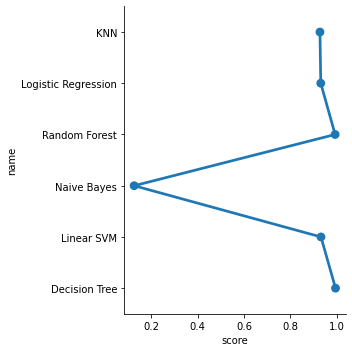

In [75]:
sns.factorplot(x='score',y='name',data=df)

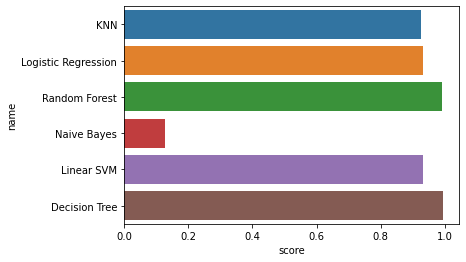

In [76]:
sns.barplot(x='score',y='name',data=df,saturation=0.75)

### Prediction of classes of thyroid using Decision tree (since it has high accuracy)

In [77]:
Y_pred_dt = dt.predict(X_test[0:80])

In [78]:
Y_pred_dt

array([2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])